In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns",None)
pd.pandas.set_option('display.max_rows', None)

In [2]:
df=pd.read_csv('/Users/sbilike/Desktop/DataScience/Practicing DS/Titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Split data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df,
    df['Survived'],
    test_size=0.3,
    random_state=43)

In [7]:
X_train.shape,X_test.shape,y_test.shape,y_train.shape

((623, 12), (268, 12), (268,), (623,))

# Dropping columns based on domain knowledge

In [8]:
X_train.drop(['PassengerId','Ticket'],axis=1,inplace=True)
X_test.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [9]:
X_train.shape,X_test.shape

((623, 10), (268, 10))

# Missing Values

In [10]:
missingValues=X_train.isnull().mean()[X_train.isnull().mean()>0].sort_values(ascending=False)
missingValues.to_frame()

,0
Cabin,0.762440
Age,0.189406
Embarked,0.001605


In [11]:
X_train.drop('Cabin',axis=1,inplace=True)
X_test.drop('Cabin',axis=1,inplace=True)

In [12]:
X_train.shape,X_test.shape

((623, 9), (268, 9))

# Missing value imputation

In [13]:
X_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         118
SibSp         0
Parch         0
Fare          0
Embarked      1
dtype: int64

In [14]:
X_test.isnull().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age         59
SibSp        0
Parch        0
Fare         0
Embarked     1
dtype: int64

In [15]:
from feature_engine import missing_data_imputers as mdi

In [16]:
imputer = mdi.MeanMedianImputer(imputation_method='median',variables='Age')
imputer.fit(X_train)

MeanMedianImputer(variables=['Age'])

In [17]:
imputer.imputer_dict_

{'Age': 29.0}

In [18]:
X_train=imputer.transform(X_train)
X_test=imputer.transform(X_test)

In [19]:
imputer = mdi.CategoricalVariableImputer(imputation_method='frequent', variables='Embarked')
imputer.fit(X_train)

CategoricalVariableImputer(imputation_method='frequent', variables=['Embarked'])

In [20]:
imputer.imputer_dict_

{'Embarked': 'S'}

In [21]:
X_train=imputer.transform(X_train)
X_test=imputer.transform(X_test)

In [22]:
X_train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
X_test.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Title Feature Transformation

In [24]:
X_train['Name'].head(10)

597                                 Johnson, Mr. Alfred
476                             Renouf, Mr. Peter Henry
102                           White, Mr. Richard Frasar
361                           del Carlo, Mr. Sebastiano
230        Harris, Mrs. Henry Birkhardt (Irene Wallach)
805                           Johansson, Mr. Karl Johan
710    Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")
590                                Rintamaki, Mr. Matti
638              Panula, Mrs. Juha (Maria Emilia Ojala)
331                                 Partner, Mr. Austen
Name: Name, dtype: object

In [25]:
X_train['Title']=X_train.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
X_test['Title']=X_test.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [26]:
X_test.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
770,0,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,9.5000,S,Mr
853,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,39.4000,S,Miss
144,0,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.5000,S,Mr
141,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,7.7500,S,Miss
261,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,31.3875,S,Master
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,S,Miss
794,0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,7.8958,S,Mr
390,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,120.0000,S,Mr
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,16.0000,S,Mrs
675,0,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.0,0,0,7.7750,S,Mr


In [27]:
X_train['Title'].unique()

array(['Mr', 'Mrs', 'Mlle', 'Dr', 'Sir', 'Rev', 'Lady', 'Miss', 'Master',
       'Jonkheer', 'Col', 'Major', 'Capt', 'Don', 'Ms'], dtype=object)

In [28]:
X_test['Title'].unique()

array(['Mr', 'Miss', 'Master', 'Mrs', 'Rev', 'Dr', 'Mme', 'Col', 'Mlle',
       'the Countess'], dtype=object)

In [29]:
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

In [30]:
X_train['Title'] =X_train['Title'].map(normalized_titles)
X_test['Title'] =X_test['Title'].map(normalized_titles)

In [31]:
X_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Officer', 'Royalty', 'Master'], dtype=object)

In [32]:
X_test['Title'].unique()

array(['Mr', 'Miss', 'Master', 'Mrs', 'Officer', 'Royalty'], dtype=object)

In [33]:
X_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,0.0000,S,Mr
476,0,2,"Renouf, Mr. Peter Henry",male,34.0,1,0,21.0000,S,Mr
102,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,77.2875,S,Mr
361,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,27.7208,C,Mr
230,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,83.4750,S,Mrs


In [34]:
X_train.drop('Name',axis=1,inplace=True)
X_test.drop('Name',axis=1,inplace=True)

# New Feature 'FamilySize' introducing 

In [35]:
X_train['FamilySize'] = X_train.Parch + X_train.SibSp + 1
X_test['FamilySize'] = X_test.Parch + X_test.SibSp + 1

In [36]:
X_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
597,0,3,male,49.0,0,0,0.0000,S,Mr,1
476,0,2,male,34.0,1,0,21.0000,S,Mr,2
102,0,1,male,21.0,0,1,77.2875,S,Mr,2
361,0,2,male,29.0,1,0,27.7208,C,Mr,2
230,1,1,female,35.0,1,0,83.4750,S,Mrs,2


In [37]:
X_train['FamilySize'].unique()

array([ 1,  2,  6,  3,  5,  4,  7,  8, 11])

In [38]:
X_train.drop(['SibSp','Parch'],axis=1,inplace=True)
X_test.drop(['SibSp','Parch'],axis=1,inplace=True)

# Convert Male and Female to numbers

In [39]:
X_train['Sex'] = X_train['Sex'].map({'male': 1, 'female': 0})
X_test['Sex'] = X_test['Sex'].map({'male': 1, 'female': 0})

In [40]:
X_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
597,0,3,1,49.0,0.0000,S,Mr,1
476,0,2,1,34.0,21.0000,S,Mr,2
102,0,1,1,21.0,77.2875,S,Mr,2
361,0,2,1,29.0,27.7208,C,Mr,2
230,1,1,0,35.0,83.4750,S,Mrs,2


# One Hot Encoding

In [41]:
pclass_dummies=pd.get_dummies(X_train['Pclass'],prefix="Pclass", drop_first=True)
title_dummies=pd.get_dummies(X_train['Title'], prefix="Title",drop_first=True)
embarked_dummies=pd.get_dummies(X_train['Embarked'],prefix="Embarked", drop_first=True)

In [42]:
X_train = pd.concat([X_train,pclass_dummies,title_dummies,embarked_dummies], axis=1)

In [43]:
X_train.drop(['Pclass', 'Title','Embarked'], axis=1, inplace=True)

In [44]:
X_train.head()

,Survived,Sex,Age,Fare,FamilySize,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_Q,Embarked_S
597,0,1,49.0,0.0000,1,0,1,0,1,0,0,0,0,1
476,0,1,34.0,21.0000,2,1,0,0,1,0,0,0,0,1
102,0,1,21.0,77.2875,2,0,0,0,1,0,0,0,0,1
361,0,1,29.0,27.7208,2,1,0,0,1,0,0,0,0,0
230,1,0,35.0,83.4750,2,0,0,0,0,1,0,0,0,1


In [45]:
pclass_dummies=pd.get_dummies(X_test['Pclass'],prefix="Pclass", drop_first=True)
title_dummies=pd.get_dummies(X_test['Title'], prefix="Title",drop_first=True)
embarked_dummies=pd.get_dummies(X_test['Embarked'],prefix="Embarked", drop_first=True)

In [46]:
X_test = pd.concat([X_test,pclass_dummies,title_dummies,embarked_dummies], axis=1)

In [47]:
X_test.drop(['Pclass', 'Title','Embarked'], axis=1, inplace=True)

In [48]:
X_train.drop(['Fare'],axis=1,inplace=True)
X_test.drop(['Fare'],axis=1,inplace=True)

<AxesSubplot:>

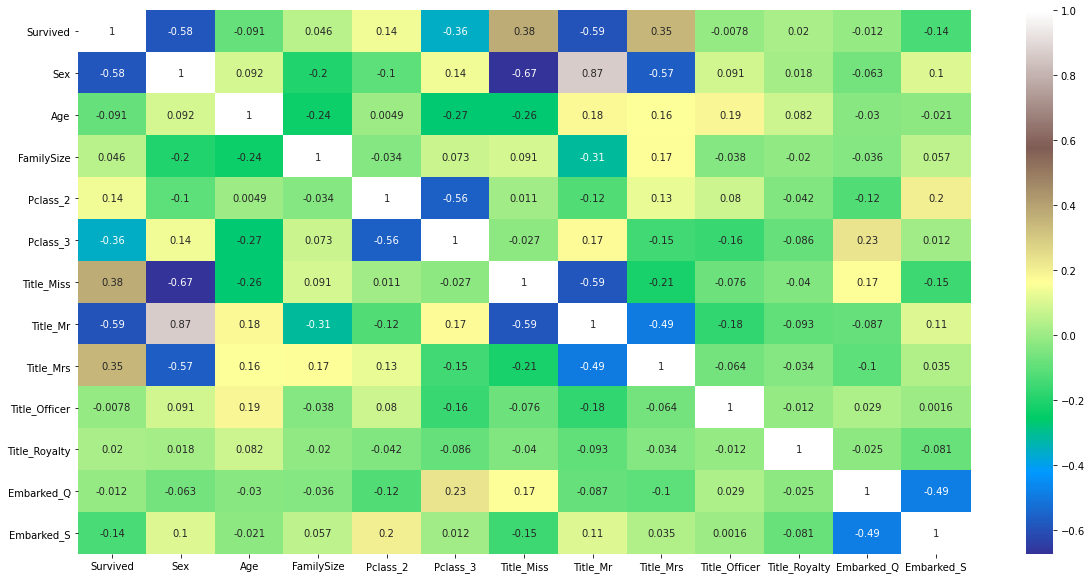

In [49]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot=True, cmap='terrain')

In [50]:
X_test.head()

,Survived,Sex,Age,FamilySize,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_Q,Embarked_S
770,0,1,24.0,1,0,1,0,1,0,0,0,0,1
853,1,0,16.0,2,0,0,1,0,0,0,0,0,1
144,0,1,18.0,1,1,0,0,1,0,0,0,0,1
141,1,0,22.0,1,0,1,1,0,0,0,0,0,1
261,1,1,3.0,7,0,1,0,0,0,0,0,0,1


In [51]:
X_train.shape,X_test.shape

((623, 13), (268, 13))

In [52]:
y_train=X_train['Survived']
y_test=X_test['Survived']
X_train.drop('Survived',axis=1,inplace=True)
X_test.drop('Survived',axis=1,inplace=True)

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score 
print ("Accuracy score: ",accuracy_score(y_test,y_pred))

Accuracy score:  0.7873134328358209


In [55]:
model.score(X_train,y_train)

0.841091492776886

In [56]:
model.score(X_test,y_test)

0.7873134328358209

In [57]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[145,  19],
       [ 38,  66]])

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       164
           1       0.78      0.63      0.70       104

    accuracy                           0.79       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.79      0.79      0.78       268

